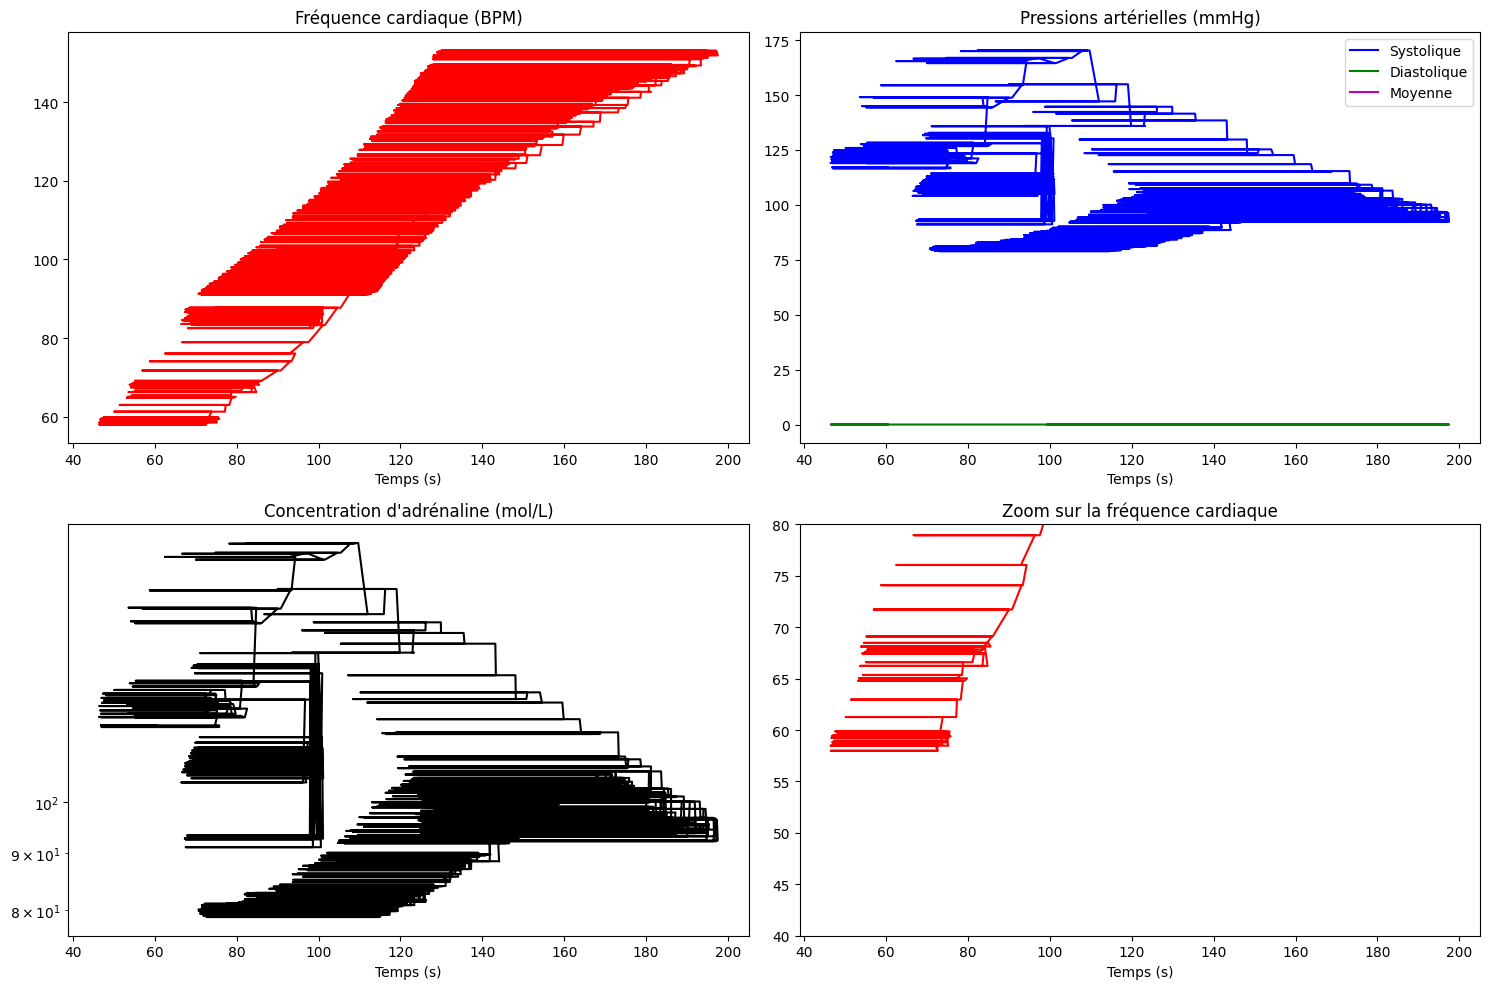

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('Adrenaline.txt', 
                 sep='\t', 
                 decimal=',',
                 header=None,
                 names=['Temps', 'Freq_cardiaque', 'Pression_systolique',
                        'Pression_diastolique', 'Concentration_adrenaline', 
                        'Pression_moyenne'])

# Configuration des graphiques
plt.figure(figsize=(15, 10))

# Fréquence cardiaque
plt.subplot(2, 2, 1)
plt.plot(df['Temps'], df['Freq_cardiaque'], 'r-')
plt.title('Fréquence cardiaque (BPM)')
plt.xlabel('Temps (s)')

# Pressions artérielles
plt.subplot(2, 2, 2)
plt.plot(df['Temps'], df['Pression_systolique'], 'b-', label='Systolique')
plt.plot(df['Temps'], df['Pression_diastolique'], 'g-', label='Diastolique')
plt.plot(df['Temps'], df['Pression_moyenne'], 'm-', label='Moyenne')
plt.title('Pressions artérielles (mmHg)')
plt.xlabel('Temps (s)')
plt.legend()

# Concentration d'adrénaline
plt.subplot(2, 2, 3)
plt.plot(df['Temps'], df['Concentration_adrenaline'], 'k-')
plt.title('Concentration d\'adrénaline (mol/L)')
plt.xlabel('Temps (s)')
plt.yscale('log')  # Échelle logarithmique pour mieux voir les variations

# Zoom sur la réponse cardiaque
plt.subplot(2, 2, 4)
plt.plot(df['Temps'], df['Freq_cardiaque'], 'r-')
plt.title('Zoom sur la fréquence cardiaque')
plt.xlabel('Temps (s)')
plt.ylim(40, 80)

plt.tight_layout()
plt.show()

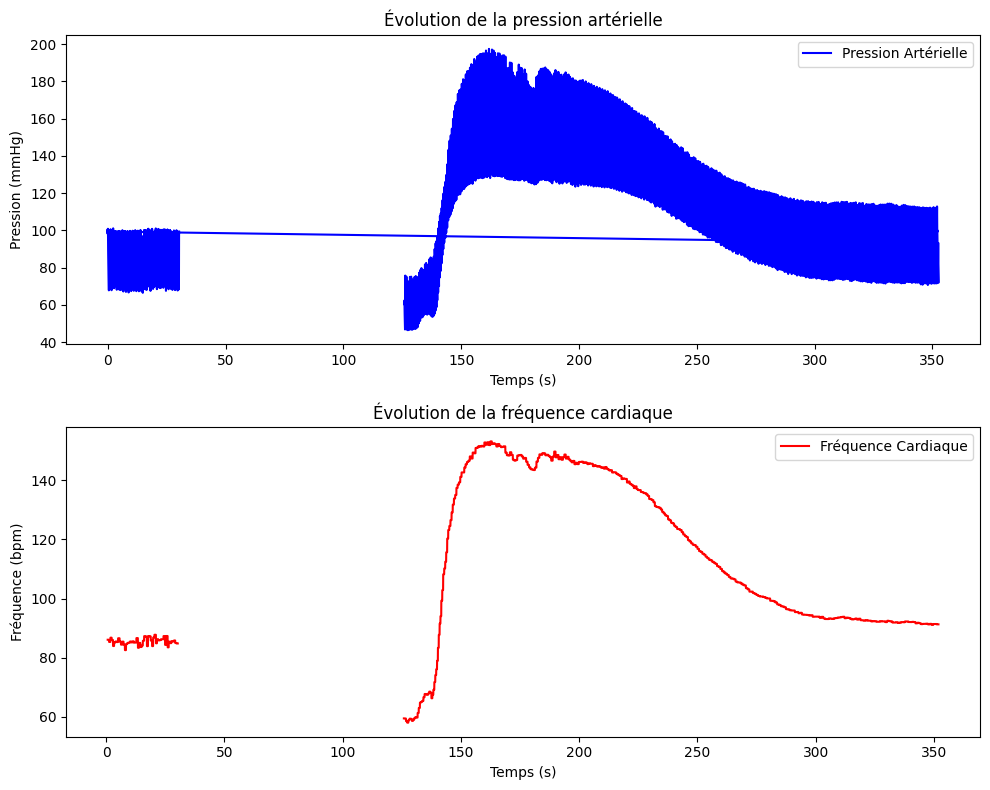

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Chemin vers le fichier (à adapter si besoin)
file_path = "Adrenaline.txt"

# Lire le fichier en précisant :
# - le séparateur de colonnes (tabulation)
# - le séparateur décimal (virgule)
df = pd.read_csv(file_path, sep="\t", header=None, decimal=",")

# Si le fichier contient une colonne vide (parce que chaque ligne se termine par une tabulation),
# on la supprime.
if df.shape[1] > 6:
    df = df.iloc[:, :6]

# Attribution de noms de colonnes hypothétiques (à adapter selon la documentation du fichier)
df.columns = [
    "Temps (s)", 
    "Pression artérielle (mmHg)", 
    "Fréquence cardiaque (bpm)", 
    "Autre1", 
    "Concentration Adrénaline", 
    "Autre2"
]

# (Optionnel) Vérifier que les colonnes numériques sont bien de type float
df = df.astype(float)

# Visualisation : tracer la pression artérielle et la fréquence cardiaque en fonction du temps
plt.figure(figsize=(10, 8))

# Graphique de la pression artérielle
plt.subplot(2, 1, 1)
plt.plot(df["Temps (s)"], df["Pression artérielle (mmHg)"], label="Pression Artérielle", color='b')
plt.xlabel("Temps (s)")
plt.ylabel("Pression (mmHg)")
plt.legend()
plt.title("Évolution de la pression artérielle")

# Graphique de la fréquence cardiaque
plt.subplot(2, 1, 2)
plt.plot(df["Temps (s)"], df["Fréquence cardiaque (bpm)"], label="Fréquence Cardiaque", color='r')
plt.xlabel("Temps (s)")
plt.ylabel("Fréquence (bpm)")
plt.legend()
plt.title("Évolution de la fréquence cardiaque")

plt.tight_layout()
plt.show()


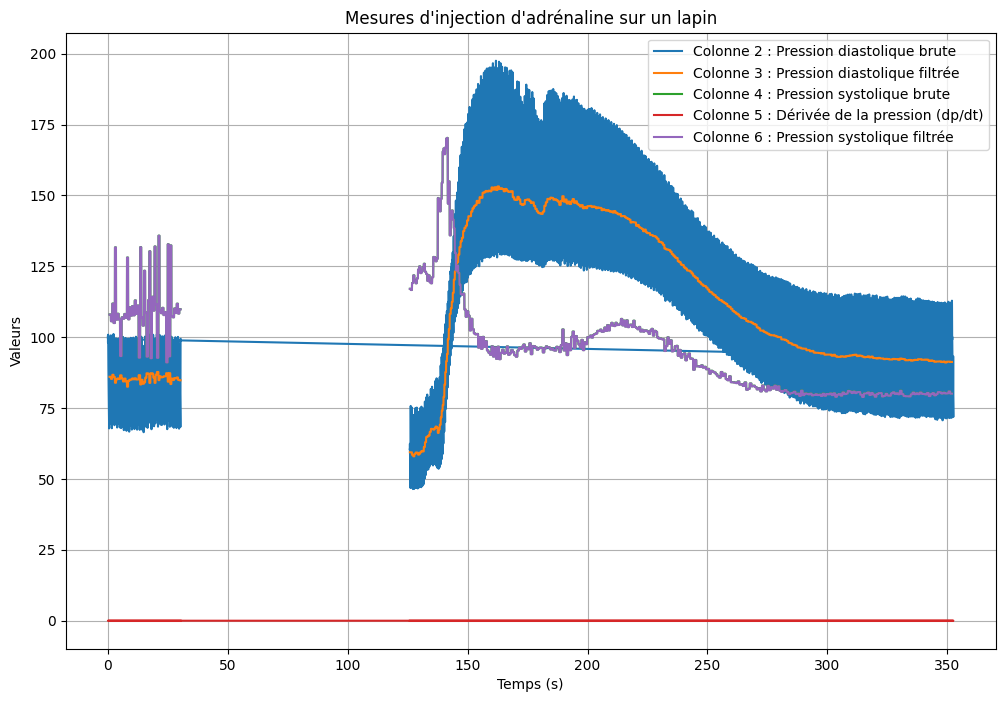

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import io

# Lecture du fichier et conversion des virgules en points
file_path = "Adrenaline.txt"
with open(file_path, "r", encoding="utf-8") as f:
    content = f.read().replace(",", ".")

# Chargement des données (colonnes séparées par tabulation ou espace)
data = np.genfromtxt(io.StringIO(content))

# Vérification de la structure des données
if data.ndim == 1:
    data = data.reshape(-1, len(data))  # Correction si une seule ligne est détectée

# Attribution des colonnes (hypothèses sur les mesures)
time = data[:, 0]  # Colonne 1 : Temps
col2 = data[:, 1]  # Hypothèse : Pression diastolique brute
col3 = data[:, 2]  # Hypothèse : Pression diastolique filtrée
col4 = data[:, 3]  # Hypothèse : Pression systolique brute
col5 = data[:, 4]  # Hypothèse : Dérivée de la pression (dp/dt)
col6 = data[:, 5]  # Hypothèse : Pression systolique filtrée

# Tracé des différentes courbes en fonction du temps
plt.figure(figsize=(12, 8))
plt.plot(time, col2, label="Colonne 2 : Pression diastolique brute")
plt.plot(time, col3, label="Colonne 3 : Pression diastolique filtrée")
plt.plot(time, col4, label="Colonne 4 : Pression systolique brute")
plt.plot(time, col5, label="Colonne 5 : Dérivée de la pression (dp/dt)")
plt.plot(time, col6, label="Colonne 6 : Pression systolique filtrée")

plt.xlabel("Temps (s)")
plt.ylabel("Valeurs")
plt.title("Mesures d'injection d'adrénaline sur un lapin")
plt.legend()
plt.grid(True)
plt.show()


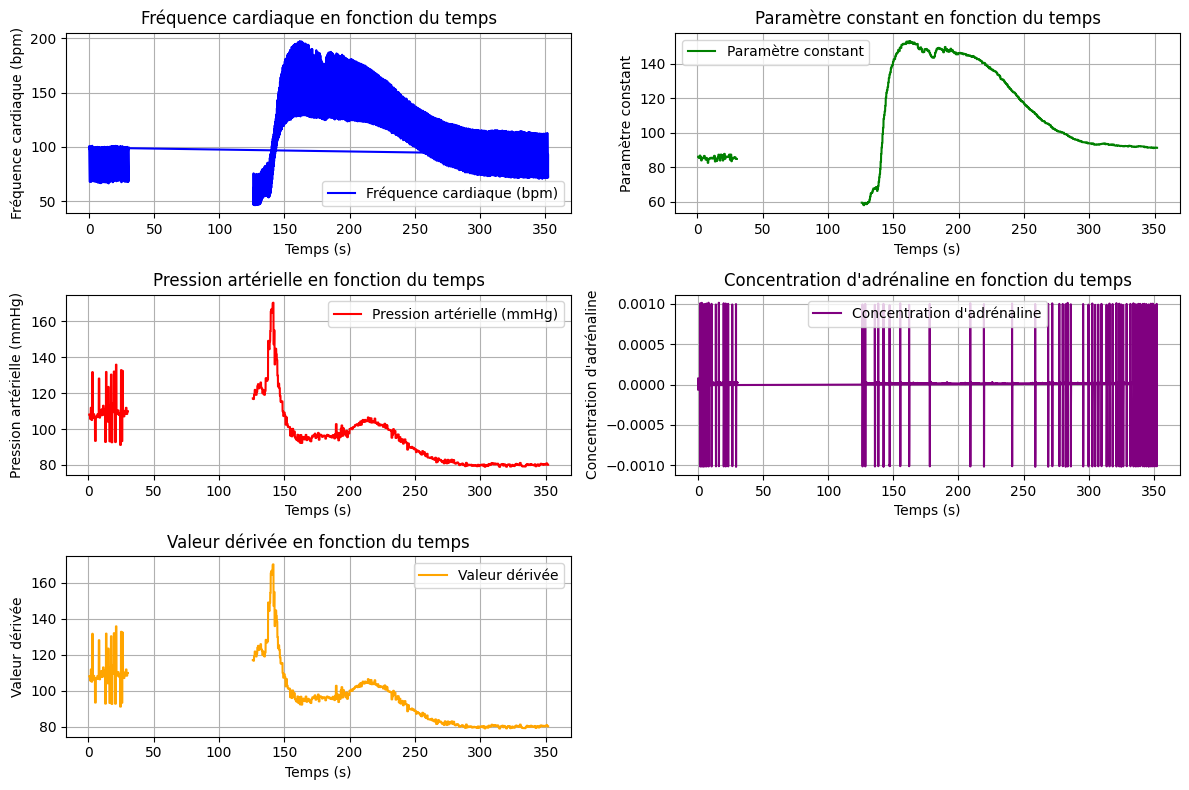

In [1]:
import matplotlib.pyplot as plt

# Charger les données depuis le fichier
with open('Adrenaline.txt', 'r') as file:
    lines = file.readlines()

# Initialiser des listes pour stocker les données
time = []          # Colonne 1 : Temps
col2 = []          # Colonne 2 : Fréquence cardiaque (hypothèse)
col3 = []          # Colonne 3 : Paramètre constant (hypothèse)
col4 = []          # Colonne 4 : Pression artérielle (hypothèse)
col5 = []          # Colonne 5 : Concentration d'adrénaline (hypothèse)
col6 = []          # Colonne 6 : Valeur dérivée (hypothèse)

# Extraire les données
for line in lines:
    # Remplacer les virgules par des points pour la conversion en float
    data = line.strip().replace(',', '.').split()
    if len(data) == 6:  # Vérifier que la ligne contient 6 colonnes
        time.append(float(data[0]))
        col2.append(float(data[1]))
        col3.append(float(data[2]))
        col4.append(float(data[3]))
        col5.append(float(data[4]))
        col6.append(float(data[5]))

# Tracer les graphiques
plt.figure(figsize=(12, 8))

# Graphique 1 : Fréquence cardiaque (Colonne 2)
plt.subplot(3, 2, 1)
plt.plot(time, col2, label='Fréquence cardiaque (bpm)', color='blue')
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence cardiaque (bpm)')
plt.title('Fréquence cardiaque en fonction du temps')
plt.legend()
plt.grid()

# Graphique 2 : Paramètre constant (Colonne 3)
plt.subplot(3, 2, 2)
plt.plot(time, col3, label='Paramètre constant', color='green')
plt.xlabel('Temps (s)')
plt.ylabel('Paramètre constant')
plt.title('Paramètre constant en fonction du temps')
plt.legend()
plt.grid()

# Graphique 3 : Pression artérielle (Colonne 4)
plt.subplot(3, 2, 3)
plt.plot(time, col4, label='Pression artérielle (mmHg)', color='red')
plt.xlabel('Temps (s)')
plt.ylabel('Pression artérielle (mmHg)')
plt.title('Pression artérielle en fonction du temps')
plt.legend()
plt.grid()

# Graphique 4 : Concentration d'adrénaline (Colonne 5)
plt.subplot(3, 2, 4)
plt.plot(time, col5, label='Concentration d\'adrénaline', color='purple')
plt.xlabel('Temps (s)')
plt.ylabel('Concentration d\'adrénaline')
plt.title('Concentration d\'adrénaline en fonction du temps')
plt.legend()
plt.grid()

# Graphique 5 : Valeur dérivée (Colonne 6)
plt.subplot(3, 2, 5)
plt.plot(time, col6, label='Valeur dérivée', color='orange')
plt.xlabel('Temps (s)')
plt.ylabel('Valeur dérivée')
plt.title('Valeur dérivée en fonction du temps')
plt.legend()
plt.grid()

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()